# Multiple Linear Regression

## Importing the libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [37]:
dataset = pd.read_csv('stock_dataset.csv')
df= dataset[(dataset != 0).all(1)]
X = df.iloc[:, 2:-1].values #python range : includes lower bound and excludes upper bound
y = df.iloc[:, -1].values

In [38]:
total_rows = df.count
print (total_rows)

<bound method DataFrame.count of      trading_code                date  ...  import  last_traded_price
0      GLAXOSMITH  2009-01-01 0:00:00  ...  142.52              332.0
1      GLAXOSMITH  2009-01-04 0:00:00  ...  142.52              356.0
2      GLAXOSMITH  2009-01-05 0:00:00  ...  142.52              345.0
3      GLAXOSMITH  2009-01-06 0:00:00  ...  142.52              332.0
4      GLAXOSMITH  2009-01-07 0:00:00  ...  142.52              331.0
...           ...                 ...  ...     ...                ...
2824   GLAXOSMITH  2020-11-19 0:00:00  ...  351.73             2055.0
2825   GLAXOSMITH  2020-11-22 0:00:00  ...  351.73             2056.6
2826   GLAXOSMITH  2020-11-23 0:00:00  ...  351.73             2060.0
2827   GLAXOSMITH  2020-11-24 0:00:00  ...  351.73             2052.2
2828   GLAXOSMITH  2020-11-25 0:00:00  ...  351.73             2046.4

[2718 rows x 16 columns]>


## Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [41]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 519.47  508.  ]
 [1002.11 1014.  ]
 [ 523.64  523.  ]
 ...
 [2144.62 2164.9 ]
 [1479.9  1481.6 ]
 [ 952.25  955.  ]]


## Evaluating the Model Performance

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.999626263936435

In [44]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print (rms)

9.969858919912015


Text(0.5, 1.0, 'Actual vs predicted')

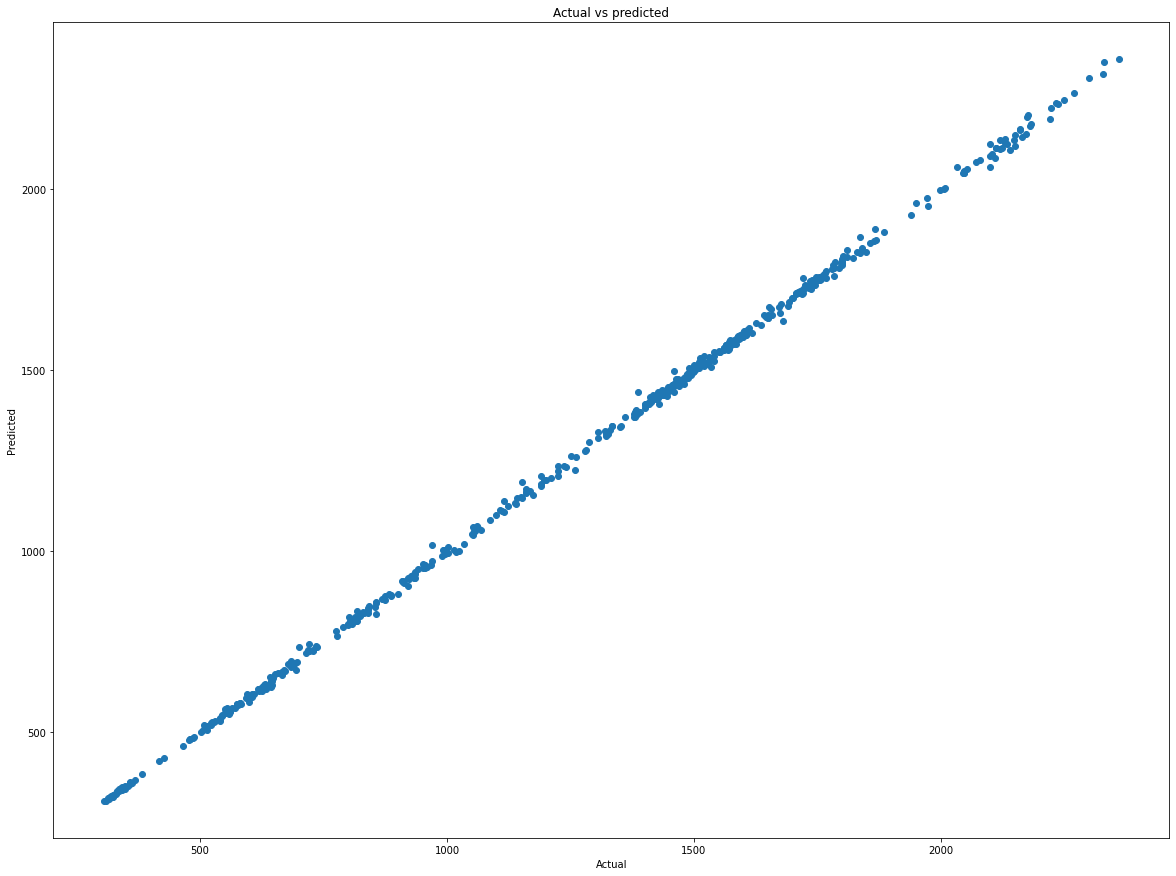

In [43]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')
